In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson
import pandas as pd

# Problem 1

Thresholds are:  12.8 ,  11.2


,True,False
Positive,0.95475,0.125
Negative,0.04525,0.875


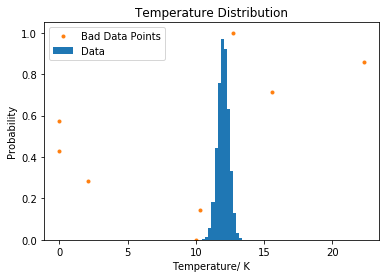

In [51]:
# Part A
# Part 1
bad_pt = np.asarray([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
data = stats.norm.rvs(12, 0.4, 100000)
final_data = np.concatenate((data, bad_pt))
fig, ax = plt.subplots(1,1)
ax.hist(final_data, 100, density = 'true', label = 'Data' )
ax.plot(bad_pt, np.linspace(0,1,8) , '.', label = 'Bad Data Points')
plt.title("Temperature Distribution")
plt.ylabel('Probability')
plt.xlabel('Temperature/ K')
plt.legend()

#Part 2
# Statistical Question: What would the temperature threshold value be in order to indicate a bad/good data, if I chose a data that's 2 sigma away from my mean. 
# Assuming I have a normal distribution with mean centered at 12K and standard deviation is 0.4.
# I choose this question because we need to find the threshold in order to determine if a data is good or bad

# Part 3
# Math Question: In order to find the threshold, we need to take the ingtegral of the standard normal distribution from negative infinity to -2 sigma and from 2 sigma to positive infinity to get the probability.
# And take the integral of the normal distribution from negative infinity to a threshold and from positive infinity to a threshold which gives the same probability as above.

#Part 4
sigma = 2
t1 = stats.norm.ppf(stats.norm.cdf(sigma), 12,  0.4)
t2 = 12 - (t1 - 12)
print('Thresholds are: ', t1, ', ', t2)
delete = len(final_data[final_data > t1]) + len(final_data[final_data < t2])
keep = len(final_data) - delete
delete2 = len(bad_pt[bad_pt > t1]) + len(bad_pt[bad_pt < t2])
keep2 = len(bad_pt) - delete2
yp = (keep-keep2)/len(data)
nn = delete2/len(bad_pt)
yn = 1 - yp
np = 1 - nn

test = {'True':[yp, yn], 'False':[np, nn]}
truthtable = pd.DataFrame(test, index = ['Positive', 'Negative'])
truthtable

In [52]:
# Part B
# The number of omissions depends on the value of threshold, because it depends on how big the sigma value we want to choose in order for us to keep the good data and throw away the bad data.
# For example, if I chose the sigma to be 4, there will be more bad data that we would keep instead of the good data.
# It's a predictable quantity here, becasue we have a really big sample size which has a lot more good data than the bad data, and since there are so many good data so it follows the normal distribution. 

In [53]:
# Part C
# Yes, there are bad data coming in if we choose a small sigma value which results a wider ranged threshold and will let more bad data in.
# However, it could be avoided by picking a bigger sigma value and have a samller ranged threshold, so it would stop most of the bad data getting in,
# but it would also mean that we would throw some part of good data away instead.

# Problem 2

In [54]:
# Question in words: Assume our background is a standard normal distribution with the standard deviation of 1 arcsecond, and true movement will likely appear when the value is greater. 
# So what is the threshold distance would be for us to tell if it's a true movement and the it's 5 sigma away from the mean.

# Question in math: We first find the probabibility by integrating the standard normal distribution. Then what is the value that would give us the same probability by integrating the normal distribution from positive infinity to a threshold distance value.

# Problem 3

In [60]:
# The distribution is a Poisson distribution with the mean = 1 * 8 * 60 * 15 = 7200 counts. 
# Part 1
# Question in words: Assume our background is a poisson distribution with mean counts of 7200, what is the probability of observing a counts of 6800 and below.

# Part 2
# Question in math: We first find the probability by integrating the poisson distribution from negative infinity to 6800. Then take the integral of the standard normal distribution from the negative infinity to a sigma value which would give us the same probability, and what is the sigma value would be.

# Part 3
mean = 7200
ptest = poisson.cdf(6800, mean)
sig = stats.norm.ppf(ptest)
print('sigma = ', sig)
# The moon shadow detection has a signficance of -4.751


sigma =  -4.750747965777188
